The code below is based upon the following blog:

*   https://blog.tanka.la/2018/05/27/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-example-using-tensorflow-js/


It was updated to save and download models as shown here:

*   https://blog.tensorflow.org/2018/07/

And further updated to plot the loss history as shown here: 
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit


In [45]:
# This needs to be done once for each newly connected/allocated session. It can be skipped after that via "Runtime-->Run [beginning with and] after"

# Install required libraries
!pip install -q git+https://github.com/tensorflow/docs
!pip install tensorflowjs 


In [46]:
# These parameters control some parameters of the neural network and its training

# These are the parameters you most likely want to explore
TRAIN_SIZE=200              # This is the number of examples presented to the network during each epoch
EPOCHS=70                   # This is the number of epochs, i.e. passes over the training set
DENSE_LAYERS=3              # The number of densely hidden layers within the neural network 

# Feel free to change this, if you'd like, but doing so may not be particularly illuminating for this lab
TEST_SIZE=200               # This is the number of never-seen-before images used to evaluate the performance after training is complete

In [47]:
# Imports to bring in libraries we need and sometimes give them shorthand aliases 
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [48]:
# load data
(training_images, training_labels), (validation_images, validation_labels) = mnist.load_data()


In [49]:
# Reshaping to format which CNN expects (batch, height, width, channels)
training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1).astype('float32')

In [50]:
validation_images = validation_images.reshape(validation_images.shape[0], validation_images.shape[1], validation_images.shape[2], 1).astype('float32')

In [51]:
# Limit size of data

training_images = training_images[0:TRAIN_SIZE]
training_labels = training_labels[0:TRAIN_SIZE]
validation_images = validation_images[0:TEST_SIZE]
validation_labels = validation_labels[0:TEST_SIZE]

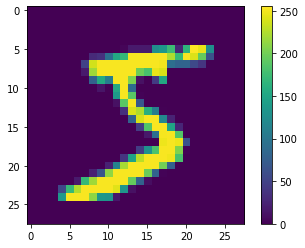

Label: 5


In [52]:
plt.figure()
plt.imshow(training_images[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()
print ("Label: " + str(training_labels[0]))

In [53]:
# normalize inputs from 0-255 to 0-1
training_images/=255
validation_images/=255

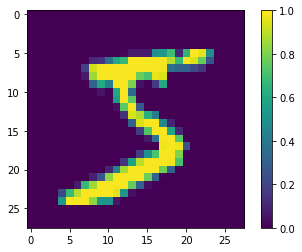

Label: 5


In [54]:
plt.figure()
plt.imshow(training_images[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()
print ("Label: " + str(training_labels[0]))

In [55]:
# one hot encode
number_of_classes = 10
training_labels = np_utils.to_categorical(training_labels, number_of_classes)
validation_labels = np_utils.to_categorical(validation_labels, number_of_classes)

In [56]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(training_images.shape[1], training_images.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
for dense_layer in range (DENSE_LAYERS):
  model.add(Dense(768, activation='relu'))

model.add(Dense(number_of_classes, activation='softmax'))

In [57]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [58]:
# Fit the model
history = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=EPOCHS, batch_size=5)

Epoch 1/70
40/40 [==============================] - 1s 25ms/step - loss: 1.9457 - accuracy: 0.3200 - val_loss: 1.5652 - val_accuracy: 0.4900
Epoch 2/70
40/40 [==============================] - 1s 22ms/step - loss: 0.7919 - accuracy: 0.7200 - val_loss: 0.7660 - val_accuracy: 0.7300
Epoch 3/70
40/40 [==============================] - 1s 21ms/step - loss: 0.3651 - accuracy: 0.9000 - val_loss: 0.7269 - val_accuracy: 0.7350
Epoch 4/70
40/40 [==============================] - 1s 21ms/step - loss: 0.1502 - accuracy: 0.9450 - val_loss: 0.7899 - val_accuracy: 0.8050
Epoch 5/70
40/40 [==============================] - 1s 21ms/step - loss: 0.1813 - accuracy: 0.9550 - val_loss: 0.9867 - val_accuracy: 0.7550
Epoch 6/70
40/40 [==============================] - 1s 22ms/step - loss: 0.2012 - accuracy: 0.9250 - val_loss: 0.8476 - val_accuracy: 0.7350
Epoch 7/70
40/40 [==============================] - 1s 22ms/step - loss: 0.1608 - accuracy: 0.9350 - val_loss: 0.3357 - val_accuracy: 0.9050
Epoch 8/70
40

(0.0, 2.0)

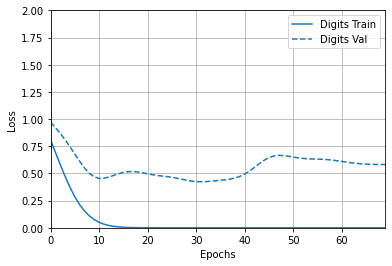

In [59]:
history_list = {}
history_list['Digits'] = history
max_loss = max(max(history.history['loss']),max(history.history['val_loss']))
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(history_list)
plt.ylim([0, int(max_loss+0.99999999)])

In [60]:
# Final evaluation of the model
metrics = model.evaluate(validation_images, validation_labels, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.5864434242248535, 0.8899999856948853]


In [61]:
# Save the model
model.save('handwriting.h5')

In [62]:
!mkdir model
!tensorflowjs_converter --input_format keras handwriting.h5 model/

mkdir: cannot create directory ‘model’: File exists
2020-11-17 19:54:14.143320: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [63]:
!zip -r handwriting.zip model 

updating: model/ (stored 0%)
updating: model/group1-shard2of4.bin (deflated 8%)
updating: model/model.json (deflated 83%)
updating: model/group1-shard3of4.bin (deflated 8%)
updating: model/group1-shard4of4.bin (deflated 8%)
updating: model/group1-shard1of4.bin (deflated 8%)
updating: model/group1-shard1of2.bin (deflated 8%)
updating: model/group1-shard2of2.bin (deflated 8%)


In [64]:
from google.colab import files
files.download('handwriting.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>